<a href="https://colab.research.google.com/github/geethaa23/titanic-survival-prediction/blob/main/titanic_survival_predictionn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import the necessary dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
#load dataset
data=pd.read_csv("/content/sample_data/train.csv")

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data.shape

(891, 12)

In [6]:
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [7]:
#as cabin columns is missing majority of the features we cannot replace it with anyother so we are dropping it
data = data.drop(columns='Cabin',axis=1)
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [8]:
data['Age'].fillna(data['Age'].mean(),inplace=True)

/tmp/ipython-input-1761542025.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].mean(),inplace=True)


here embarked is a categorical data so we cannot replace it with mean/median(only work for numerical data) so we first check the category which is more repetitive(mode) and assign the missing values in embarked column to that category

In [9]:
print(data['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [10]:
print(data['Embarked'].mode()[0])

S


In [11]:
data['Embarked'].fillna(data['Embarked'].mode()[0],inplace=True)

/tmp/ipython-input-1523684883.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Embarked'].fillna(data['Embarked'].mode()[0],inplace=True)


In [12]:
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [13]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Data Analysis**


In [14]:
data['Survived'].value_counts()

,count
Survived,
0,549
1,342


In [16]:

data['Sex'].value_counts()

,count
Sex,
male,577
female,314


**Data Visualisation**

<Axes: xlabel='Survived', ylabel='count'>

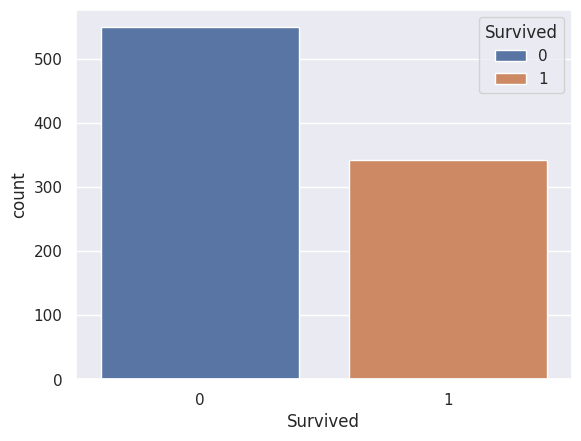

In [17]:
sns.set()
#countplot for suvrvived class
sns.countplot(x='Survived',data=data,hue='Survived')

<Axes: xlabel='Sex', ylabel='count'>

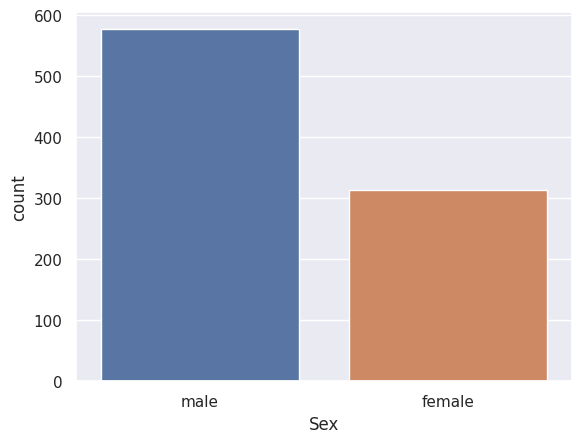

In [18]:
#countplot for gender category
sns.countplot(x='Sex',data=data, hue='Sex')

<Axes: xlabel='Survived', ylabel='count'>

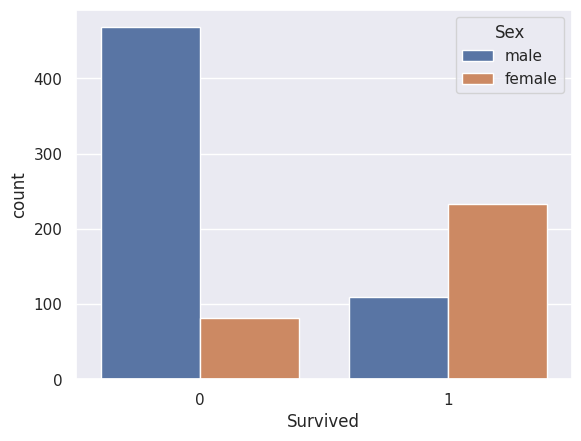

In [19]:
#number of survivors gender wise
sns.countplot(x='Survived',hue='Sex',data=data)

**converting categorical data into numerical.**

why are we doing this? cuz ml models cannot understand text(strings) so we need to convert it to numerical data

In [20]:
data.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)
data.head()

/tmp/ipython-input-3715919453.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


**Seperating features and target**

here we seperate taget which is survived from the features and also remove unnecessary colums like PassengerId	and Ticket


In [21]:
x=data.drop(columns=['PassengerId','Survived','Name','Ticket'],axis=1)
y=data['Survived']

In [22]:
print(x)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500         0
1         1    1  38.000000      1      0  71.2833         1
2         3    1  26.000000      0      0   7.9250         0
3         1    1  35.000000      1      0  53.1000         0
4         3    0  35.000000      0      0   8.0500         0
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000         0
887       1    1  19.000000      0      0  30.0000         0
888       3    1  29.699118      1      2  23.4500         0
889       1    0  26.000000      0      0  30.0000         1
890       3    0  32.000000      0      0   7.7500         2

[891 rows x 7 columns]


In [23]:
print(y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


**Splitting the data into training and test data**

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)
print(x.shape, x_train.shape, x_test.shape)

(891, 7) (712, 7) (179, 7)


**Model training**

here we are choosing **logistic regression** becoz it is simple and interpretable for binary classification

In [27]:
lr=LogisticRegression()

In [29]:
lr.fit(x_train,y_train)#here we train the model with training data

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

**Model evaluation** using accuaracy score

In [31]:
x_train_pred=lr.predict(x_train)
training_data_accuracy=accuracy_score(y_train,x_train_pred)#here we are finding the training data accuracy
print('Accuracy score of training data : ', training_data_accuracy)

Accuracy score of training data :  0.8075842696629213


In [32]:
#here we are finding the test data accuracy
x_test_pred=lr.predict(x_test)
test_data_accuracy=accuracy_score(y_test,x_test_pred)
print('Accuracy score of test data : ', test_data_accuracy)


Accuracy score of test data :  0.7821229050279329
